# **Business Case BdB: Score de originación**
## **Sección 1: EDA**

In [2]:
# Librerias iniciales

import numpy as np # Opereaciones de matrices
import pandas as pd # Manejo DF
import os 
import logging
import matplotlib.pyplot as plt

#!pip install seaborn

pd.set_option('display.float_format', lambda x: '%.2f' % x)

path = os.path.abspath(os.getcwd()) # Utilizar el path donde esté asignado el cuaderno
base_ = pd.read_csv(os.path.join(path,"base_caso_negocio.csv"))


## **Notas EDA**
Tenemos 15k registros y 18 variables.

De las variables podemos inferir que:


#### **Variables con -999**
- ANTIGUEDADMAXIMAPASIVOS

- 'SCORE_ADVANCE'
- 'ANTIGUEDADMAXIMAPASIVOS'
-  'MAXIMAANTIGUEDADCTASABIERTAS'
-  'NUMSUSCRIPTORSECTORFINAN'
- 'MAXIATRASOU12MSECREL'
- 'MAXANTIGCARTERASCERRADASU12M'
- 'MINIMAANTIGUEDADCTASCERRADAS'
- 'ANTIGUEDADMAXIMACREDITO'
- 'CONTMORA30SECREALU12M'
- 'VREAL_SUMASALDOACTUAL'
-   'VPRO_ENDSISTEMASINBB'


#### **Vacios relevantes**

- **BGI60_12** 

- **VLR_COUTA_DATACREDITO**

#### **Outliers relevantes**

- **MAXAITRASOU12MSECREAL**
- **MAXANTIGCARTERASCERRADASU12M**
- **MINIMAANTIGUEDADCTASCERRADAS**
- **ANTIGUEDADMAXIMACREDITO**
- **CONTMORA30SECREALU12M**




#### **Sobre las variables numéricas**

- **SCORE_ADVANCE:**
    - Promedio de 721 puntos, con una desviación estándar de 117. 
    - Se encuentran valores atipicos desde 0,4 a 976.

- **ANTIGUEDADMAXIMAPASIVOS:**
    - Promedio de 129 meses con una desviación estándar de 91 meses. 
    - Existen valores atípicos entre 304 y 749 dado que están fuera del percentil 95 de la distribución de los datos.

- **MAXIMAANTIGUEDADCTASABIERTAS:**
    - Promedio de 34 meses para la antigüedad máxima de cuentas abiertas, con una desviación estándar de 51 meses.
    - El 50% de los usuarios tiene hasta 14 meses de antigüedad en sus cuentas abiertas, pero el máximo valor llega hasta 501 meses, lo que sugiere la presencia de valores atípicos.

- **NUMSUSCRIPTORSECTORFINAN:**
    - Promedio de 2 suscriptores en el sector financiero con una desviación estándar de 1.95.
    - La mayoría de los usuarios tienen entre 1 y 3 suscriptores, con un máximo de 17, que podría ser un valor atípico.

- **MAXIATRASOU12MSECREAL:**
    - Promedio de 3.90, pero la desviación estándar de 56.02 sugiere una alta variabilidad en los atrasos.
    - El 95% de los usuarios no tiene atrasos en los últimos 12 meses, mientras que algunos tienen atrasos considerables, con un máximo de 888 meses.

- **MAXANTIGCARTERASCERRADASU12M:**
    - Promedio de 15 meses, con una desviación estándar de 40 meses.
    - La mitad de los usuarios no tienen ningun valor en esta variable (0), pero hasta el percentil 95 ese valor sube a 88 y el maximo en 560, lo que indica gran variabilidad.

- **MINIMAANTIGUEDADCTASCERRADAS:**
    - Promedio de 15 meses, con una desviación estándar de 35 meses.
    - La antigüedad mínima en cuentas cerradas se encuentra mayormente concentrada hasta los 14 meses (75% de los usuarios), pero hay valores atípicos como un máximo de 355 meses.

- **ANTIGUEDADMAXIMACREDITO:**
    - Promedio de 87 meses con una desviación estándar de 92 meses.
    - El 50% de los usuarios tienen créditos con antigüedades de hasta 59 meses, mientras que el máximo de antigüedad llega a 700 meses.

- **CONTMORA30SECREALU12M:**
    - Promedio de 0.03, lo que indica que la mayoría de los usuarios no tienen moras mayores a 30 días en los últimos 12 meses.
    - El 75% de los usuarios tienen 0 moras, pero algunos valores extremos llegan hasta 12, lo que sugiere la presencia de valores atípicos.

- **VLR_COUTA_DATACREDITO:**
    - Promedio de 1,401,361 COP, con una desviación estándar muy alta de 6,727,838 COP, lo que sugiere una gran dispersión en los valores de la cuota.
    - El 50% de los usuarios tienen una cuota de hasta 183,500 COP, mientras que el valor máximo llega a 434,814,000 COP, lo que indica la presencia de valores atípicos significativos.
    - Los valores del percentil 75 alcanzan los 552,000 COP, lo que sugiere que la mayoría de las cuotas no superan ese valor, pero existen valores extremadamente altos.

- **PORCENTAJEDECUENTASALDIA:**
    - Promedio de 99.66%, con una desviación estándar de 3.57%. Esto indica que la mayoría de los usuarios tienen casi todas sus cuentas al día.
    - El 50% y el 75% de los usuarios tienen el 100% de sus cuentas al día, mientras que existen algunos usuarios con un porcentaje muy bajo (mínimo de 0%).

- **VTAR_PROMEDIOLIMITES:**
    - Promedio de 2,027,966 COP, con una desviación estándar de 4,612,759 COP, lo que indica una dispersión considerable en los límites de tarjetas de crédito.
    - El 50% de los usuarios tiene un límite de 0 COP (lo que sugiere que no tienen tarjetas de crédito o no están utilizando sus líneas de crédito), mientras que el 75% tiene un límite de hasta 2,478,250 COP.
    - El valor máximo es extremadamente alto, alcanzando los 258,000,000 COP, lo que claramente indica valores atípicos.

- **VREAL_SUMASALDOACTUAL:**
    - Promedio de 2,120,542 COP, con una desviación estándar de 8,587,899 COP, lo que refleja una gran variabilidad en los saldos actuales.
    - El 50% de los usuarios tiene un saldo de hasta 40,000 COP, mientras que el valor máximo es de 231,185,000 COP, indicando una gran dispersión y la presencia de valores atípicos.
    - El 75% de los usuarios tiene hasta 860,000 COP de saldo, lo que sugiere que la mayoría de los usuarios tienen saldos más bajos comparados con los valores atípicos superiores.

- **VPRO_ENDSISTEMASINBB:**
    - Promedio de 13,149,488 COP, con una desviación estándar muy alta de 38,734,832 COP, lo que indica una dispersión extremadamente alta.
    - El 50% de los usuarios tiene hasta 1,627,000 COP en este valor, mientras que el máximo valor llega hasta 1,316,875,200 COP, lo que es claramente un valor atípico.
    - El 75% de los usuarios tiene hasta 10,698,850 COP, lo que sugiere que los valores superiores son muy extremos comparados con la mayoría de la población.

#### **Sobre las correlaciones relevantes**

- No se encuentran correlaciones entre las variables dependientes mayores a 0.9, lo que da fuertes indicios que no hay una multicolinealidad fuerte entre algun par de variables de la base.

- Se revisa la correlación de las variables contra BGI60_12 que será la indicadora principal para entrenar el modelo de scoring de originación con el metodo spearman (para calcular la correlación basado en el orden de la variable) y el metodo pearson (para calcular la correlación de forma linear).

    - Con ambos metodos se encuentran los mismos resultados:
    
        - La variable NUMCUENTASINBB tiene correlación positiva con la variable de objetivo.

        - Las variables SCORE_ADVANCE, MAXIMAANTIGUEDADCTASABIERTAS, ANTIGUEDADMAXIMACREDITO, NUMSUSCRIPTORSECTORFINAN tienen correlación negativa con la variable de objetivo.





## **Conclusiones del EDA**

A partir del análisis exploratorio se pueden obtener las siguientes conclusiones:

#### **1. Datos Faltantes y Tratamiento de Valores Específicos**
- Algunas variables contienen valores de `-999`, lo cual indica posiblemente datos faltantes. Las variables afectadas incluyen `ANTIGUEDADMAXIMAPASIVOS`, `SCORE_ADVANCE`, `MAXIMAANTIGUEDADCTASABIERTAS`, entre otras. Este valor debe transformarse antes de modelar, ya sea imputándolo o excluyéndolo.
  
- Hay variables con vacíos relevantes, como `BGI60_12` y `VLR_COUTA_DATACREDITO`, por lo que su manejo será crítico en las etapas de preprocesamiento.

#### **2. Identificación de Outliers**
- Existen variables con valores extremos (outliers) que deberán ser tratados adecuadamente. Por ejemplo, la variable `MAXIATRASOU12MSECREAL` tiene un valor máximo de 888 meses de atraso, mientras que la mayoría de los usuarios no presentan atrasos. Lo mismo ocurre con `MINIMAANTIGUEDADCTASCERRADAS` y `ANTIGUEDADMAXIMACREDITO`, con máximos considerablemente superiores al percentil 95.
  

#### **3. Análisis Descriptivo de Variables Numéricas**
- Varias variables presentan una alta dispersión, lo que puede ser un reto para el modelado. Por ejemplo:
    - **VLR_COUTA_DATACREDITO** tiene una desviación estándar muy alta, lo que indica una gran variabilidad en las cuotas de crédito.
    - **VPRO_ENDSISTEMASINBB** tiene un valor máximo extremadamente alto (más de 1.3 mil millones COP), lo que claramente es un valor atípico.

- Las variables como **SCORE_ADVANCE**, **ANTIGUEDADMAXIMAPASIVOS**, y **MAXIMAANTIGUEDADCTASABIERTAS** muestran valores atípicos que podrían afectar la precisión del modelo si no se tratan adecuadamente.

#### **4.Correlaciones y Multicolinealidad**
- No se encontraron correlaciones mayores a 0.9 entre las variables, lo que sugiere que no hay una fuerte multicolinealidad. Esto es positivo, ya que no parece haber redundancia significativa en las variables, lo que facilita el proceso de selección de características.

- El análisis de correlación utilizando los métodos de Pearson y Spearman con respecto a `BGI60_12` revela que:
    - **NUMCUENTASINBB** tiene una correlación positiva con la variable de interés, lo que sugiere que el número de cuentas puede ser un buen predictor.
    - **SCORE_ADVANCE**, **MAXIMAANTIGUEDADCTASABIERTAS**, **ANTIGUEDADMAXIMACREDITO**, y **NUMSUSCRIPTORSECTORFINAN** muestran correlaciones negativas, lo que implica que estas variables podrían estar relacionadas con un menor riesgo crediticio en `BGI60_12`.



In [3]:
base_.describe(percentiles=[.1, .25, .5, .75, .95]).T

,count,mean,std,min,10%,25%,50%,75%,95%,max
SCORE_ADVANCE,15000.00,721.38,117.97,-999.00,616.00,663.75,721.00,789.00,885.00,976.00
BGI60_12,10500.00,0.21,0.41,0.00,0.00,0.00,0.00,0.00,1.00,1.00
NUMCUENTASINBB,14998.00,3.47,3.52,0.00,1.00,1.00,2.00,5.00,11.00,41.00
ANTIGUEDADMAXIMAPASIVOS,14998.00,117.97,151.42,-999.00,30.00,55.00,113.00,182.00,304.00,749.00
MAXIMAANTIGUEDADCTASABIERTAS,14998.00,-272.13,485.55,-999.00,-999.00,-999.00,14.00,46.00,147.15,501.00
NUMSUSCRIPTORSECTORFINAN,14998.00,-243.97,431.56,-999.00,-999.00,1.00,2.00,3.00,6.00,17.00
MAXIATRASOU12MSECREAL,14998.00,-33.74,199.03,-999.00,0.00,0.00,0.00,0.00,0.00,888.00
MAXANTIGCARTERASCERRADASU12M,14998.00,-645.34,495.64,-999.00,-999.00,-999.00,-999.00,11.00,88.00,560.00
MINIMAANTIGUEDADCTASCERRADAS,14998.00,-372.95,500.75,-999.00,-999.00,-999.00,3.00,14.00,76.00,355.00
ANTIGUEDADMAXIMACREDITO,14998.00,-85.94,426.94,-999.00,-999.00,11.00,59.00,137.00,289.00,700.00


In [4]:
base_.describe(include="object").T

,count,unique,top,freq
ESTADO,15000,2,b'APROBADO',10500
EXPERIENCIA_SF,15000,2,b'Cliente Con Experiencia',9004


In [5]:
base_.BGI60_12.value_counts()

BGI60_12
0.00    8281
1.00    2219
Name: count, dtype: int64

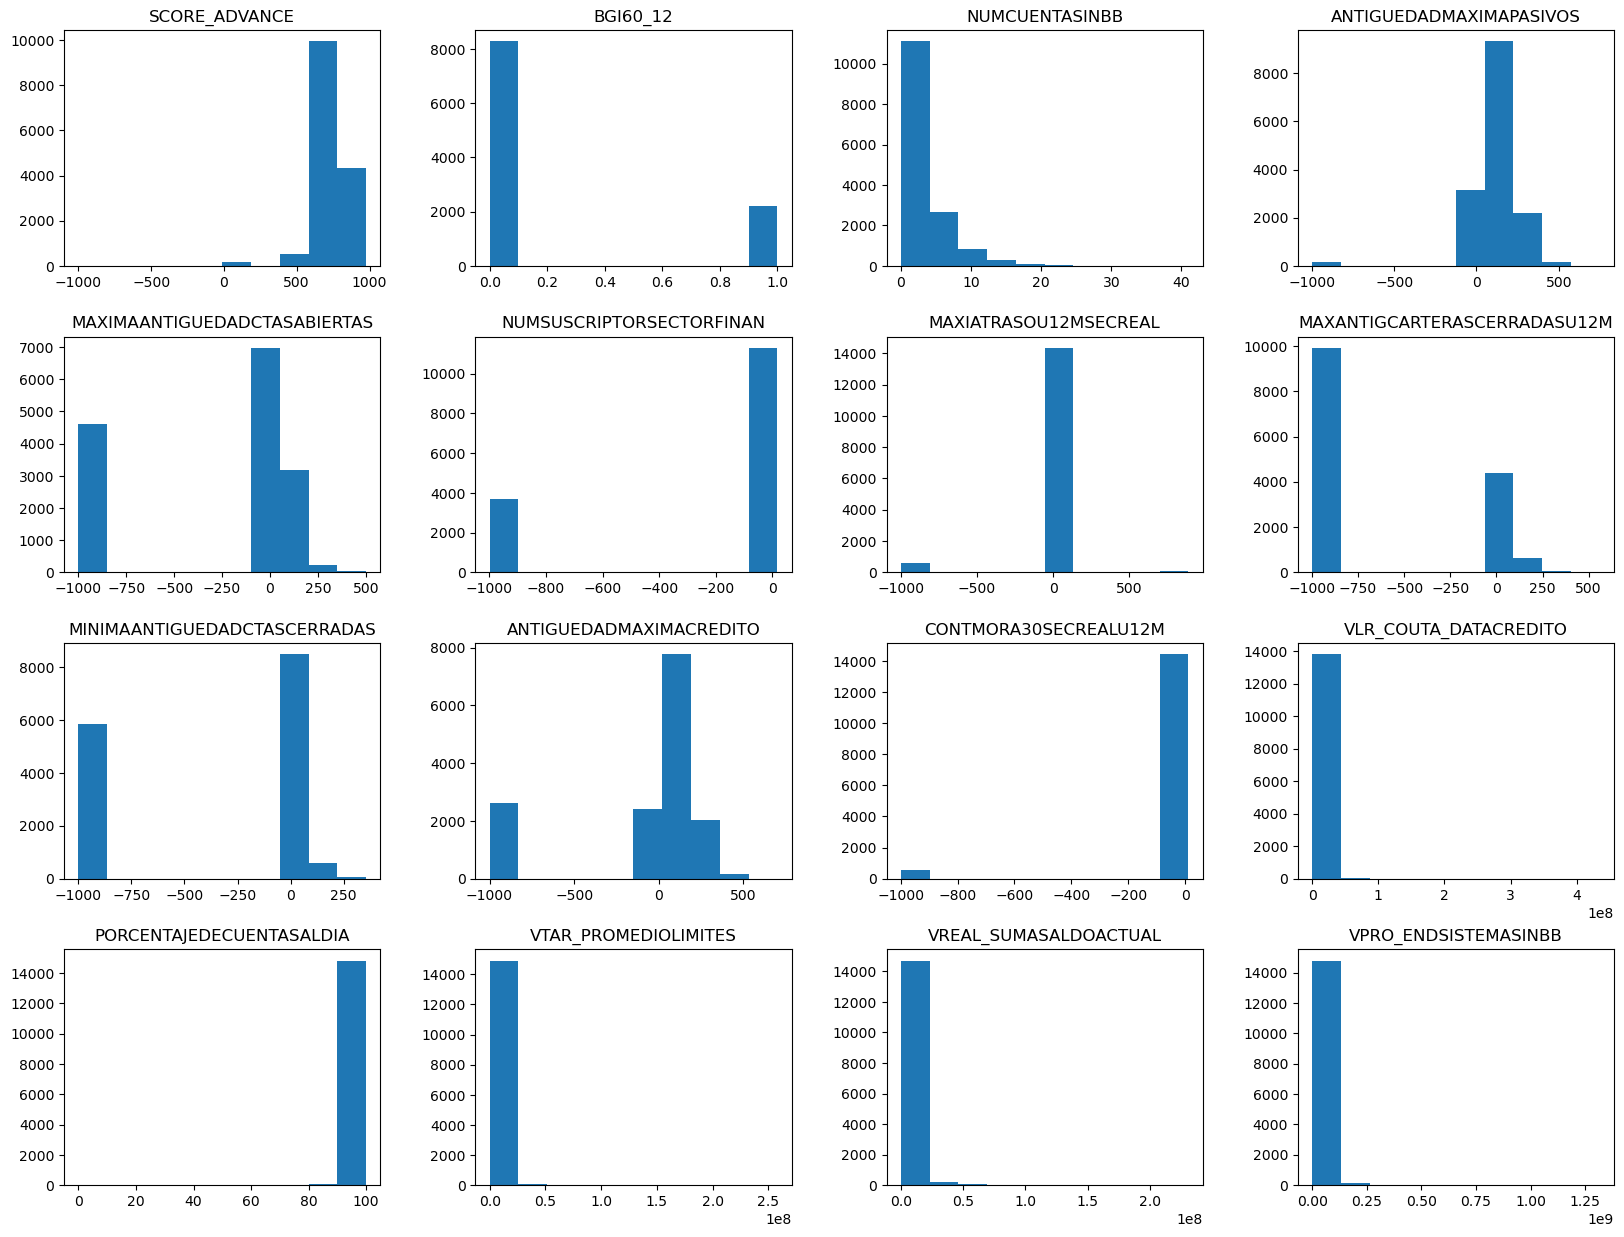

In [6]:
base_.hist(figsize=(20,15),grid=False)
plt.show()

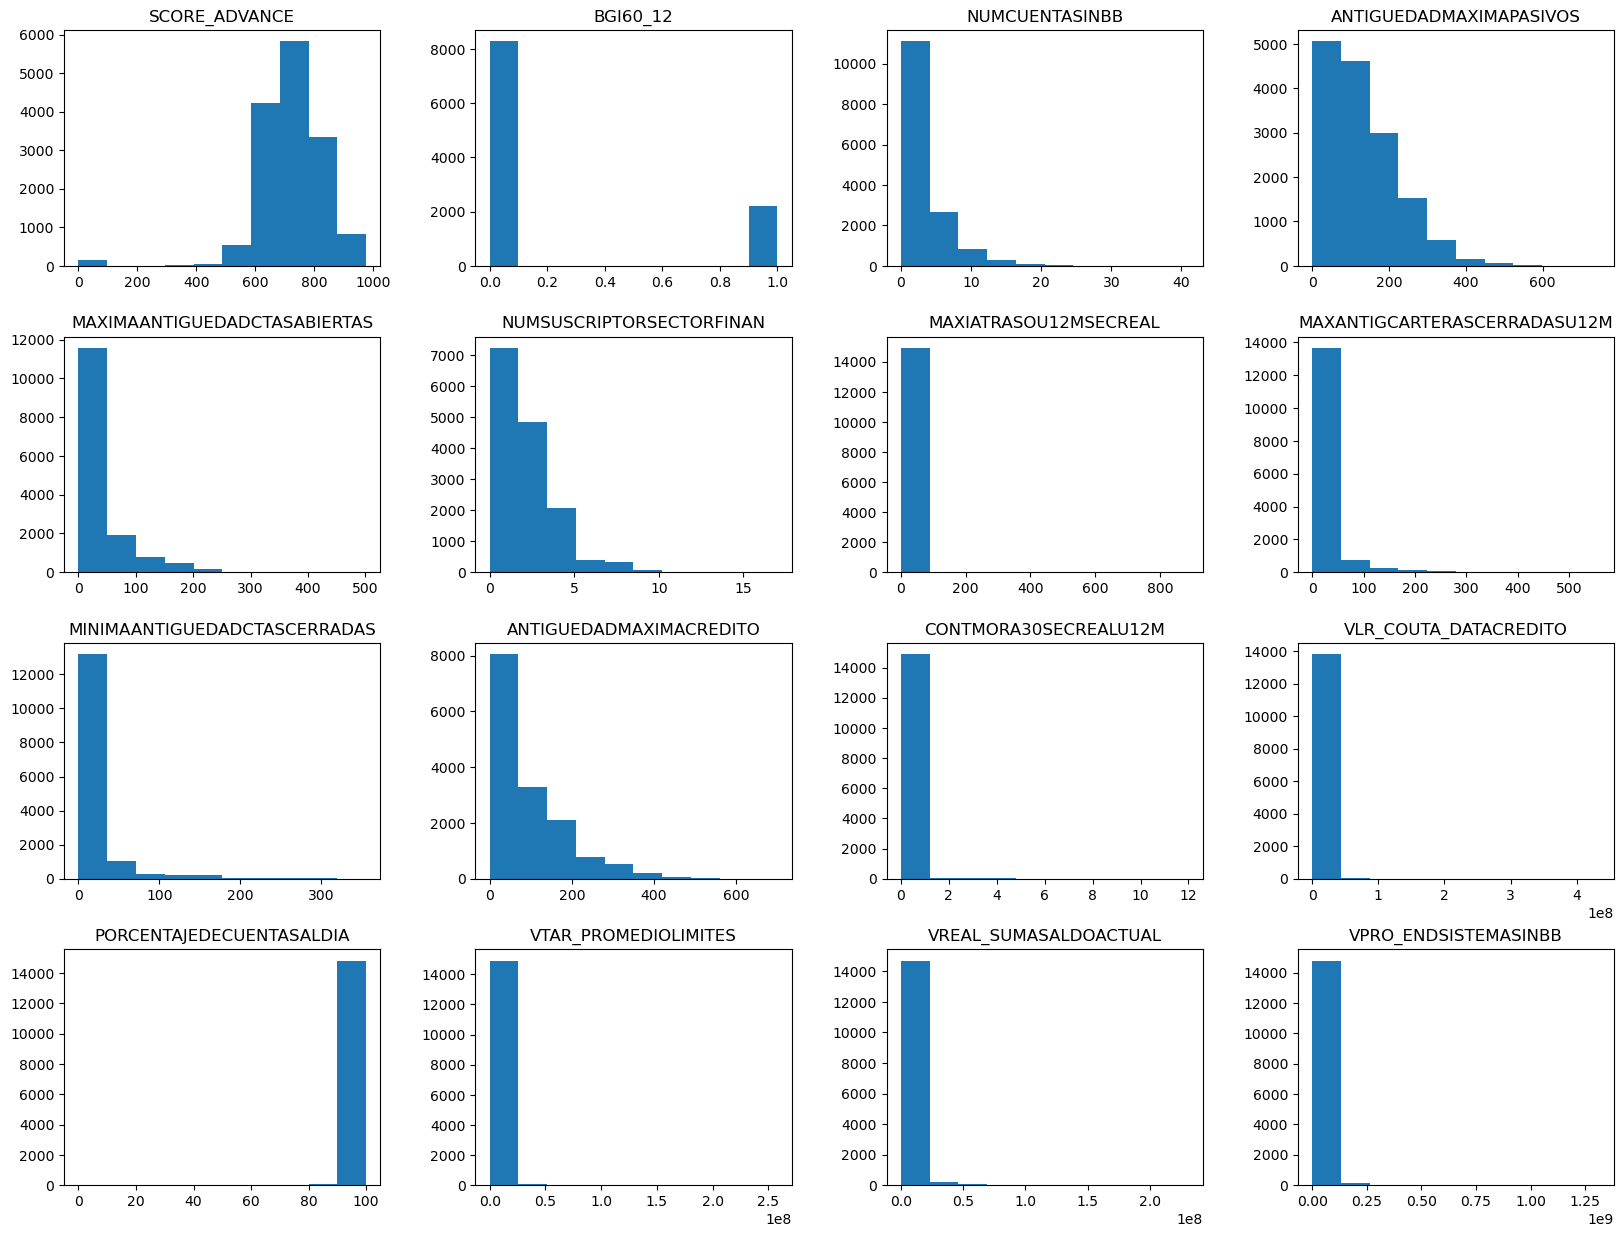

In [7]:
base_2 = base_
base_2.replace(-999,0,inplace=True)


base_2.hist(figsize=(20,15),grid=False)
plt.show()

In [8]:
base_2.describe(percentiles=[.1, .25, .5, .75, .95]).T

,count,mean,std,min,10%,25%,50%,75%,95%,max
SCORE_ADVANCE,15000.00,721.44,117.28,0.00,616.00,663.75,721.00,789.00,885.00,976.00
BGI60_12,10500.00,0.21,0.41,0.00,0.00,0.00,0.00,0.00,1.00,1.00
NUMCUENTASINBB,14998.00,3.47,3.52,0.00,1.00,1.00,2.00,5.00,11.00,41.00
ANTIGUEDADMAXIMAPASIVOS,14998.00,129.62,91.62,0.00,30.00,55.00,113.00,182.00,304.00,749.00
MAXIMAANTIGUEDADCTASABIERTAS,14998.00,34.13,51.74,0.00,0.00,0.00,14.00,46.00,147.15,501.00
NUMSUSCRIPTORSECTORFINAN,14998.00,2.02,1.95,0.00,0.00,1.00,2.00,3.00,6.00,17.00
MAXIATRASOU12MSECREAL,14998.00,3.90,56.02,0.00,0.00,0.00,0.00,0.00,0.00,888.00
MAXANTIGCARTERASCERRADASU12M,14998.00,15.55,40.41,0.00,0.00,0.00,0.00,11.00,88.00,560.00
MINIMAANTIGUEDADCTASCERRADAS,14998.00,15.78,35.19,0.00,0.00,0.00,3.00,14.00,76.00,355.00
ANTIGUEDADMAXIMACREDITO,14998.00,87.64,92.54,0.00,0.00,11.00,59.00,137.00,289.00,700.00


In [9]:
#!conda install seaborn

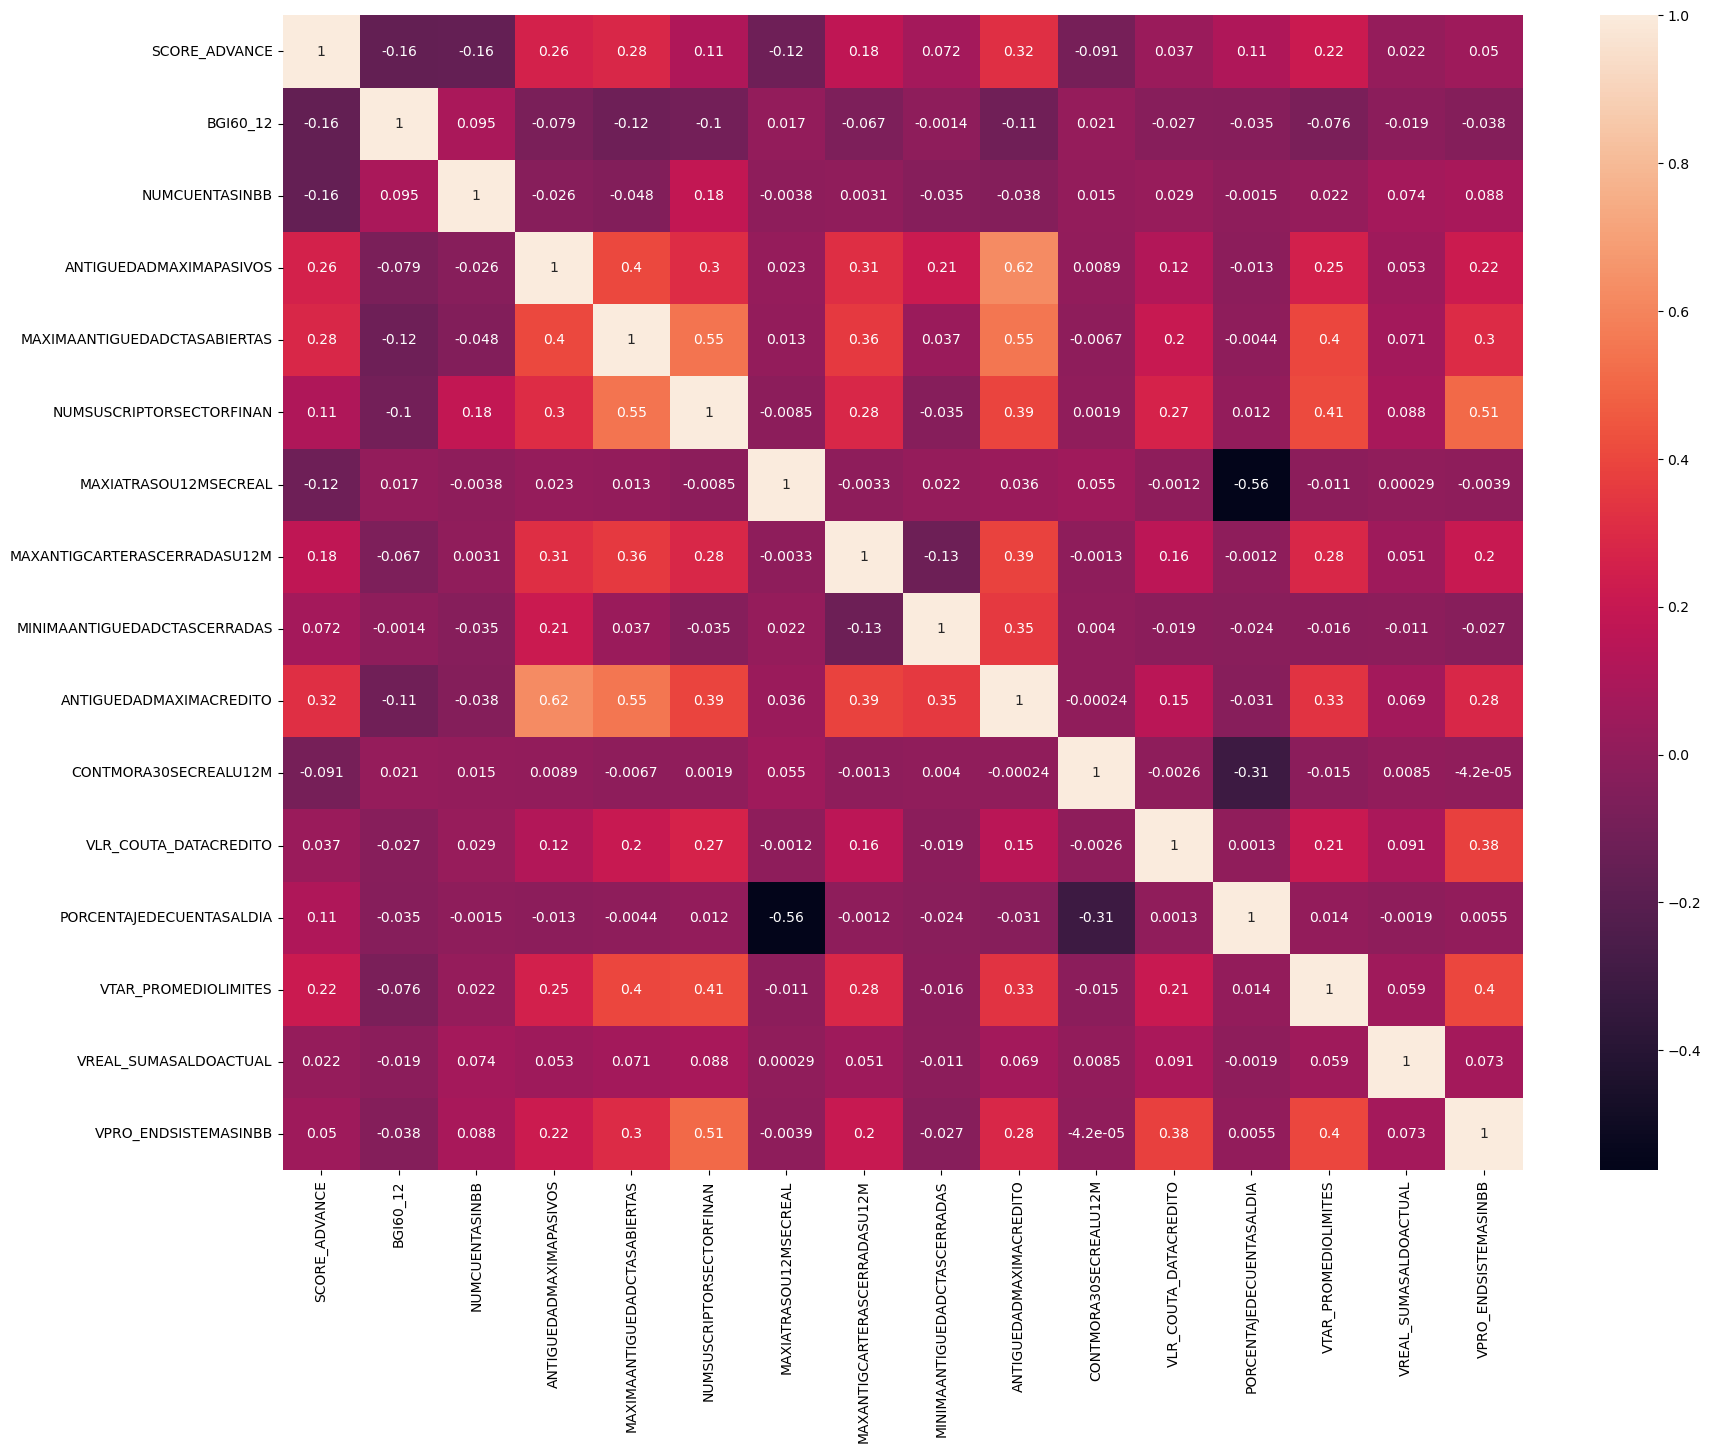

In [10]:
import seaborn as sns

plt.figure(figsize=(20,15))
g_corr = sns.heatmap(base_2.corr(numeric_only=True), annot=True)
plt.show()

In [11]:
corrs = base_2[base_2["BGI60_12"].notna()].corr(numeric_only=True)

corrs["BGI60_12"].sort_values(ascending=False)

BGI60_12                        1.00
NUMCUENTASINBB                  0.10
CONTMORA30SECREALU12M           0.02
MAXIATRASOU12MSECREAL           0.02
MINIMAANTIGUEDADCTASCERRADAS   -0.00
VREAL_SUMASALDOACTUAL          -0.02
VLR_COUTA_DATACREDITO          -0.03
PORCENTAJEDECUENTASALDIA       -0.03
VPRO_ENDSISTEMASINBB           -0.04
MAXANTIGCARTERASCERRADASU12M   -0.07
VTAR_PROMEDIOLIMITES           -0.08
ANTIGUEDADMAXIMAPASIVOS        -0.08
NUMSUSCRIPTORSECTORFINAN       -0.10
ANTIGUEDADMAXIMACREDITO        -0.11
MAXIMAANTIGUEDADCTASABIERTAS   -0.12
SCORE_ADVANCE                  -0.16
Name: BGI60_12, dtype: float64

In [12]:
corrs = base_2[base_2["BGI60_12"].notna()].corr(numeric_only=True,method="spearman")

corrs["BGI60_12"].sort_values(ascending=False)

BGI60_12                        1.00
NUMCUENTASINBB                  0.06
MAXIATRASOU12MSECREAL           0.03
CONTMORA30SECREALU12M           0.03
PORCENTAJEDECUENTASALDIA       -0.03
VREAL_SUMASALDOACTUAL          -0.03
VPRO_ENDSISTEMASINBB           -0.07
VLR_COUTA_DATACREDITO          -0.08
ANTIGUEDADMAXIMAPASIVOS        -0.08
MAXANTIGCARTERASCERRADASU12M   -0.09
VTAR_PROMEDIOLIMITES           -0.10
MINIMAANTIGUEDADCTASCERRADAS   -0.11
NUMSUSCRIPTORSECTORFINAN       -0.12
ANTIGUEDADMAXIMACREDITO        -0.13
MAXIMAANTIGUEDADCTASABIERTAS   -0.15
SCORE_ADVANCE                  -0.20
Name: BGI60_12, dtype: float64

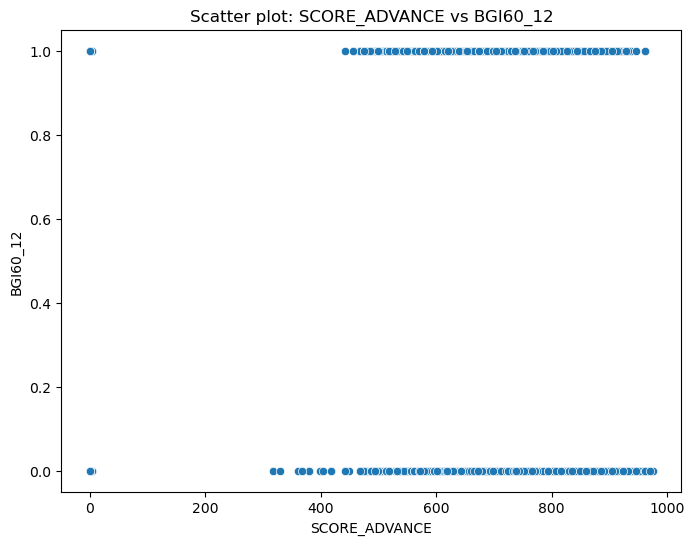

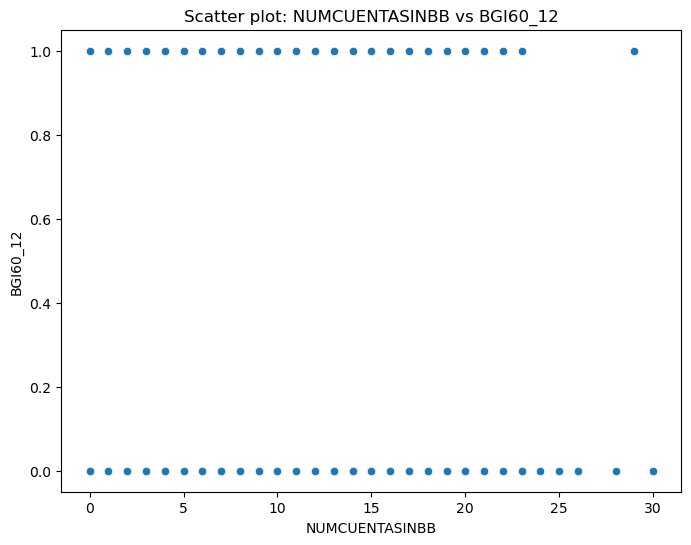

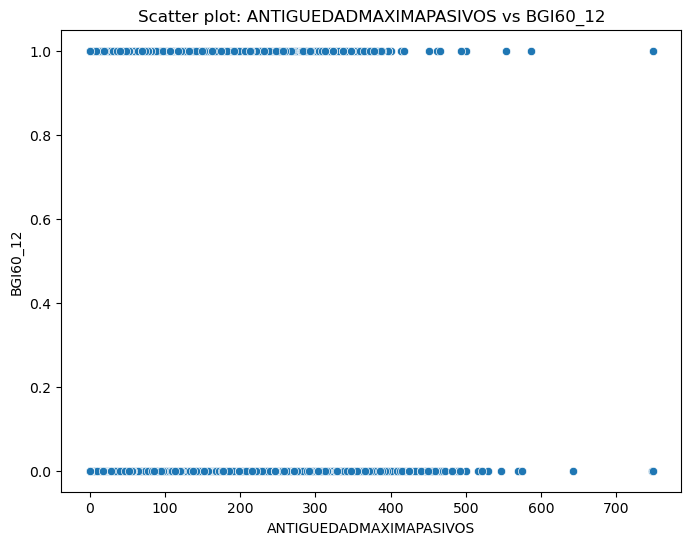

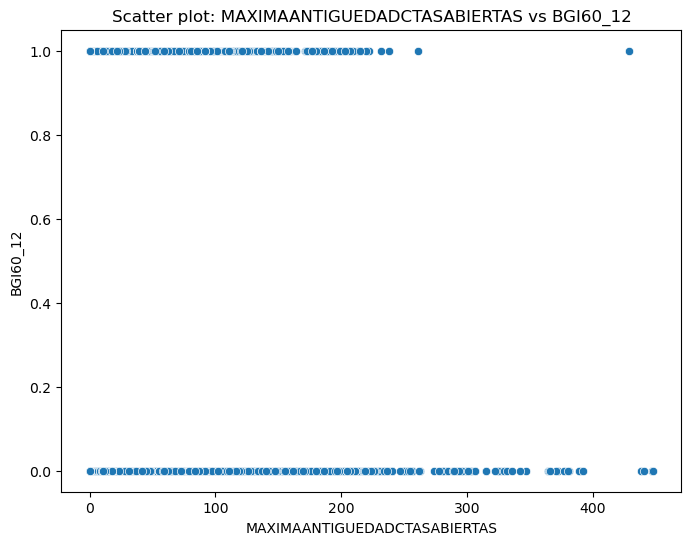

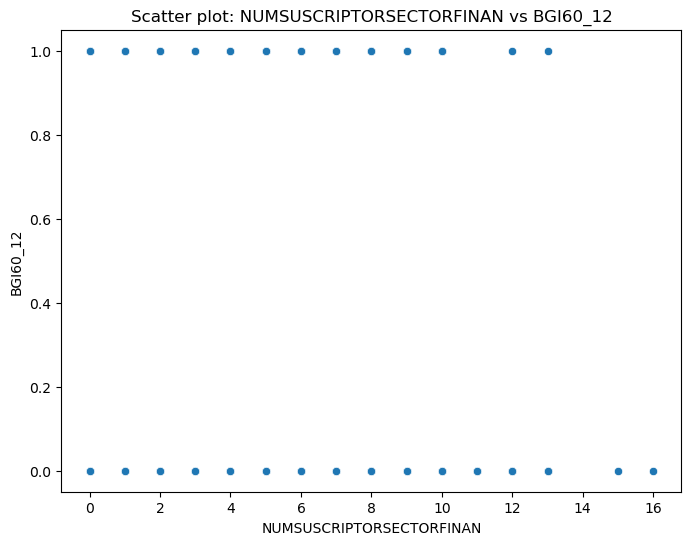

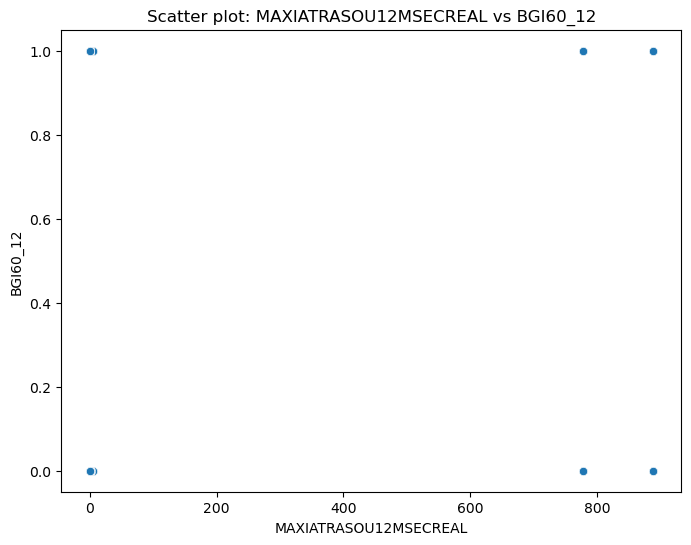

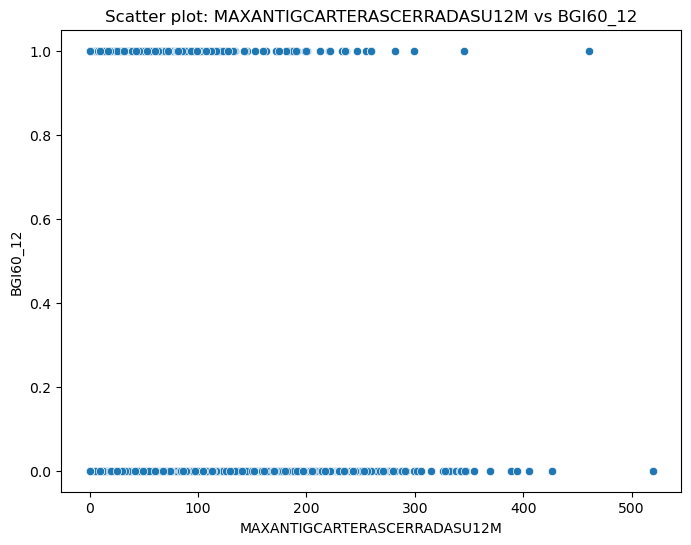

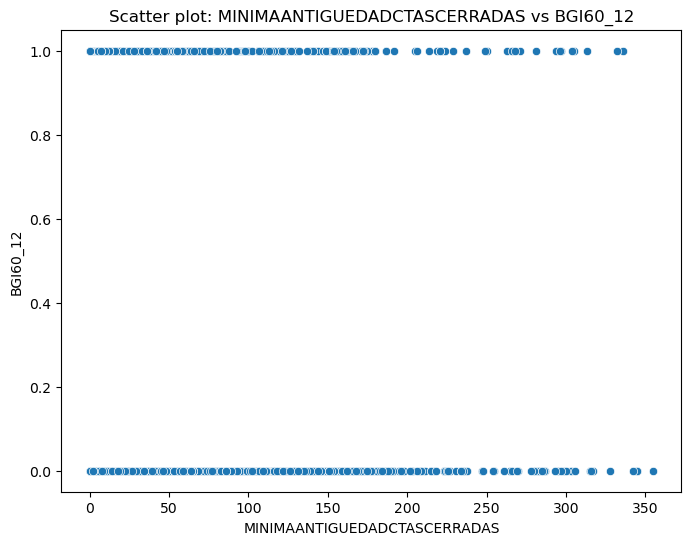

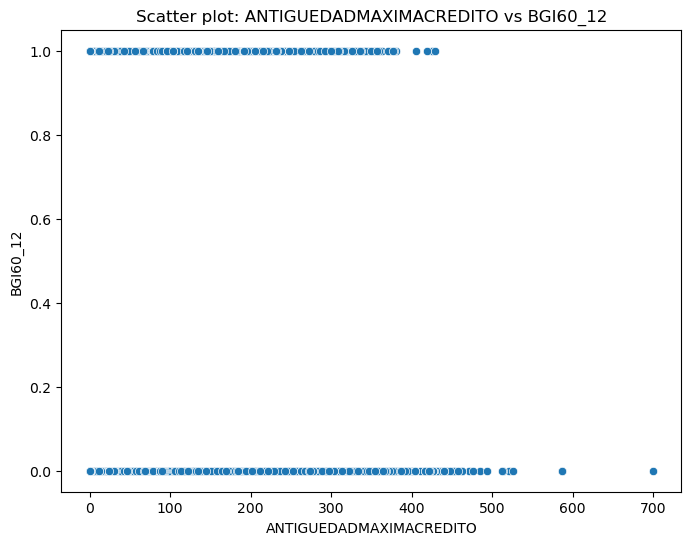

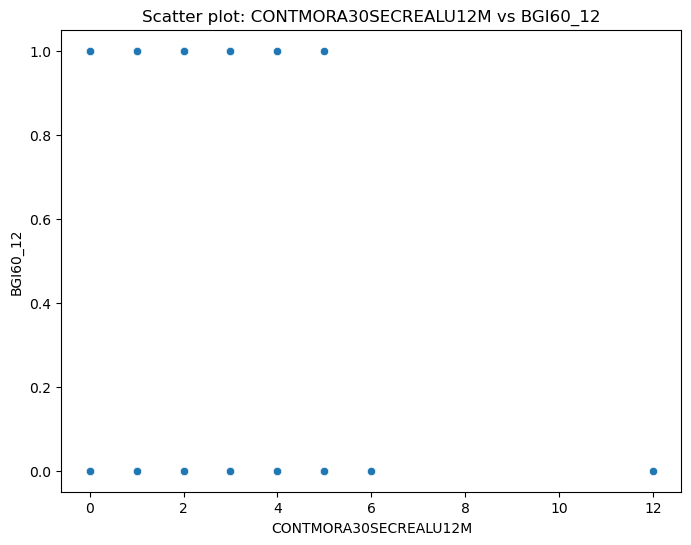

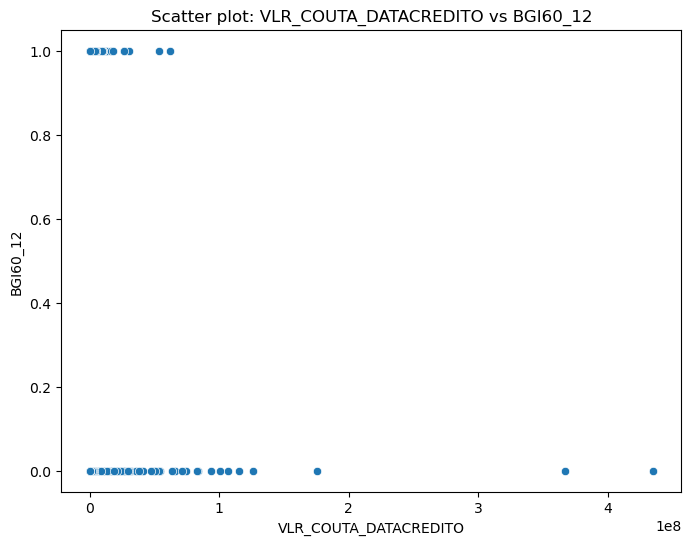

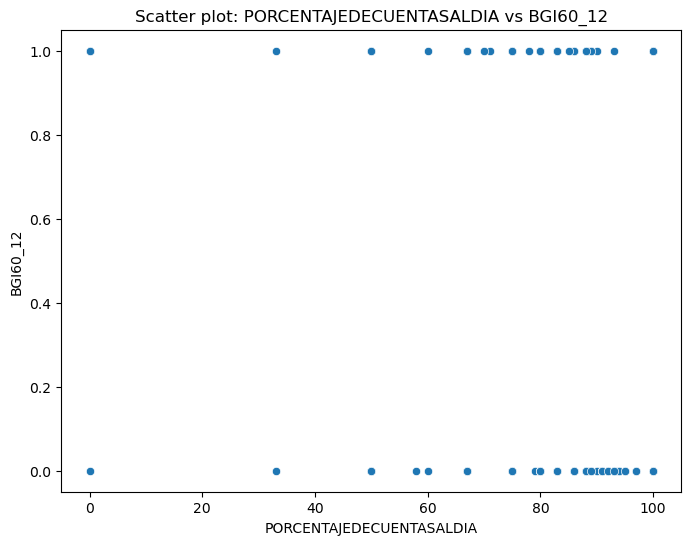

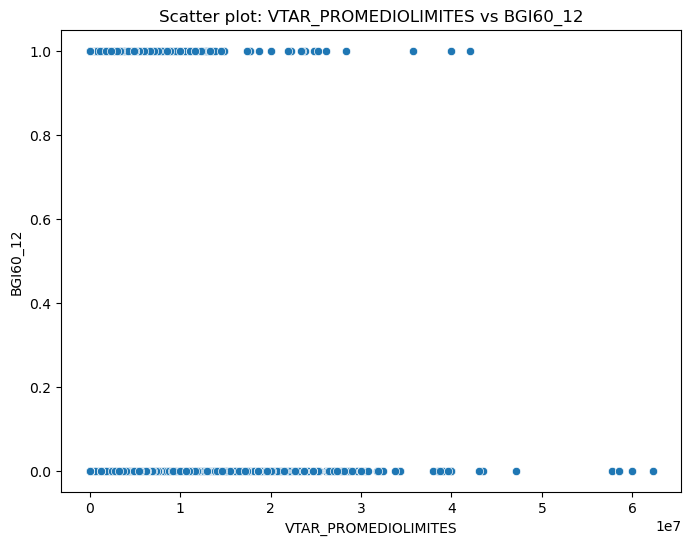

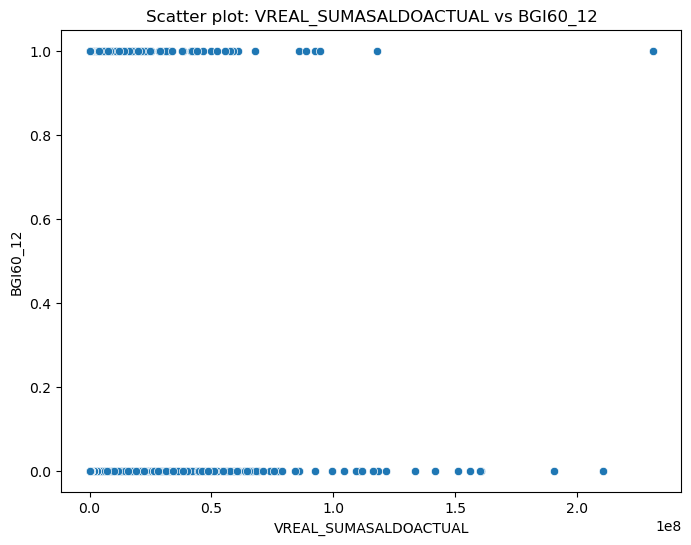

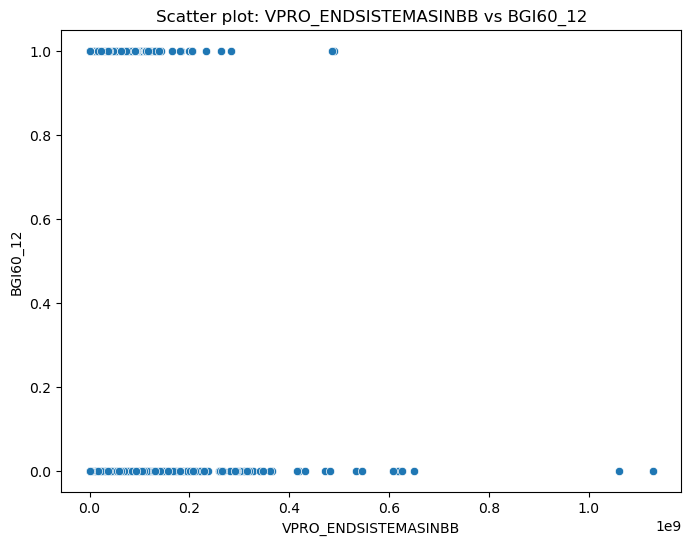

In [13]:
# Seleccionar las columnas numéricas
numerical_columns = base_2.select_dtypes(include=['float64', 'int64']).columns

# Filtrar los valores no nulos de BGI60_12
filtered_data = base_2[base_2['BGI60_12'].notna()]

# Crear scatter plots
for column in numerical_columns:
    if column != 'BGI60_12':  # Evitar scatter plot contra sí misma
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=filtered_data, x=column, y='BGI60_12')
        plt.title(f'Scatter plot: {column} vs BGI60_12')
        plt.xlabel(column)
        plt.ylabel('BGI60_12')
        plt.show()